---
title: "Edge Detection"
description: "In this tutorial we are going to learn how to detect edges in images with `kornia.filters` components."
author:
    - "Edgar Riba"
date: 07-06-2021
categories:
    - Basic
    - Edge Detection
    - kornia.filters
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/filtering_edges.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

<a href="https://huggingface.co/spaces/kornia/kornia-edge-detection"><img src="https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue.svg" alt="Open in HF Spaces"></a>

In [ ]:
%%capture
!pip install kornia
!pip install kornia-rs

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


url = "https://github.com/kornia/data/raw/main/doraemon.png"
download_image(url)

'doraemon.png'

In [ ]:
import cv2
import kornia as K
import numpy as np
import torch
import torchvision
from matplotlib import pyplot as plt

We use Kornia to load an image to memory represented in a torch.tensor

In [ ]:
x_rgb: torch.Tensor = K.io.load_image("doraemon.png", K.io.ImageLoadType.RGB32)[None, ...]  # BxCxHxW

x_gray = K.color.rgb_to_grayscale(x_rgb)

In [ ]:
def imshow(input: torch.Tensor):
    out = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis("off")
    plt.show()

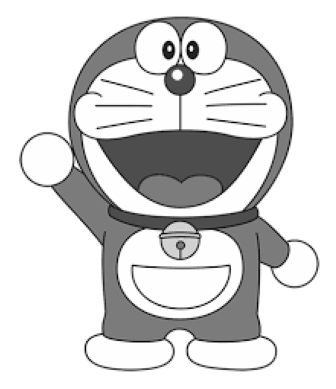

In [ ]:
imshow(x_gray)

## 1st order derivates

In [ ]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=1)  # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

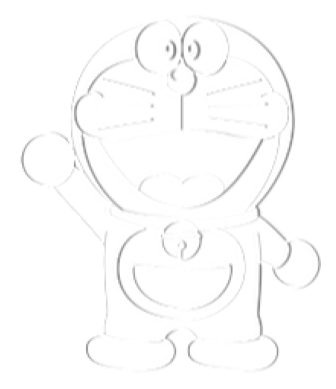

In [ ]:
# Show first derivatives in x
imshow(1.0 - grads_x.clamp(0.0, 1.0))

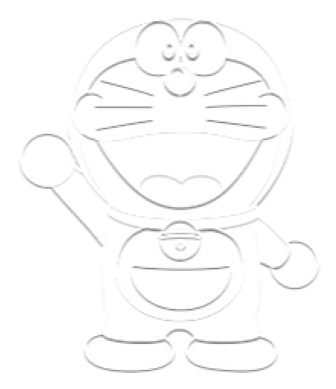

In [ ]:
# Show first derivatives in y
imshow(1.0 - grads_y.clamp(0.0, 1.0))

## 2nd order derivatives

In [ ]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=2)  # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

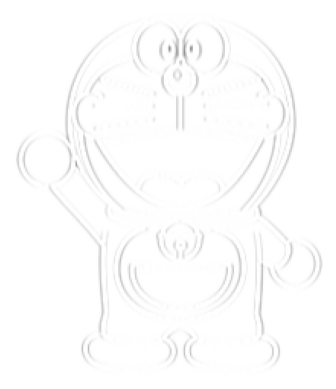

In [ ]:
# Show second derivatives in x
imshow(1.0 - grads_x.clamp(0.0, 1.0))

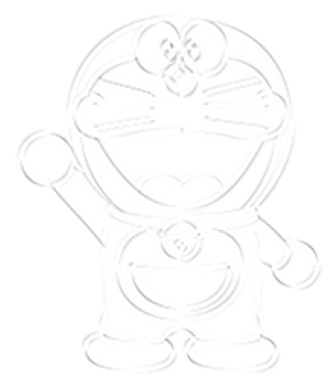

In [ ]:
# Show second derivatives in y
imshow(1.0 - grads_y.clamp(0.0, 1.0))

## Sobel Edges
Once with the gradients in the two directions we can computet the Sobel edges. However, in kornia we already have it implemented.

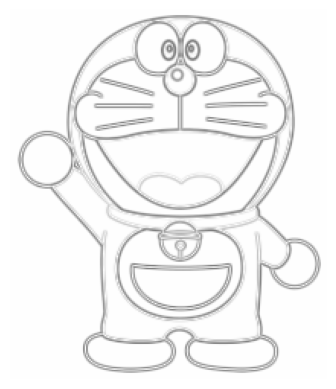

In [ ]:
x_sobel: torch.Tensor = K.filters.sobel(x_gray)
imshow(1.0 - x_sobel)

## Laplacian edges

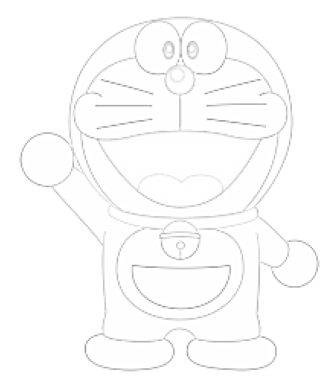

In [ ]:
x_laplacian: torch.Tensor = K.filters.laplacian(x_gray, kernel_size=5)
imshow(1.0 - x_laplacian.clamp(0.0, 1.0))

## Canny edges

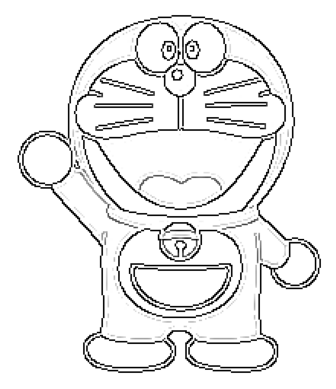

In [ ]:
x_laplacian: torch.Tensor = K.filters.canny(x_gray)[0]
imshow(1.0 - x_laplacian.clamp(0.0, 1.0))